# Cryptocurrency Trading Strategy with Fear & Greed Index
## Comprehensive Analysis with Advanced Features

**Project Goals:**
1. Analyze relationship between market sentiment and crypto returns
2. Develop and test multiple sentiment-based trading strategies
3. Incorporate professional risk management techniques
4. Provide actionable insights with visualizations

**Methodology:**
- Combined Fear & Greed Index with historical trade data
- Developed 4 strategy types (contrarian, momentum, position sizing, ML-enhanced)
- Rigorous backtesting with risk-adjusted metrics
- Portfolio-level analysis with transaction costs
- Advanced event studies around extreme sentiment



## 1. Setup and Data Loading
First, let's import all necessary libraries and load our datasets.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
print(plt.style.available)
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]

# Load the datasets
fear_greed = pd.read_csv('/content/fear_greed_index.csv')
trades = pd.read_csv('/content/historical_data.csv')

# Display basic info
print("Fear & Greed Index Data:")
print(fear_greed.info())
print("\nTrading Data:")
print(trades.info())

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Fear & Greed Index Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
mem


## 2. Data Preprocessing and Cleaning


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]

# Load the datasets
fear_greed = pd.read_csv('/content/fear_greed_index.csv')
trades = pd.read_csv('/content/historical_data.csv')

# Convert date columns to datetime - FIXED VERSION
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)

# Extract date from timestamp for joining
trades['date'] = trades['Timestamp IST'].dt.date
trades['date'] = pd.to_datetime(trades['date'])

# Clean Fear & Greed data
fear_greed = fear_greed.sort_values('date').reset_index(drop=True)

# Clean Trading data
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']
trades[numeric_cols] = trades[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create trading direction column
trades['Direction'] = trades['Side'].apply(lambda x: 1 if x == 'BUY' else -1)
trades['Cumulative_Tokens'] = trades.groupby('Coin')['Size Tokens'].cumsum()

## 3. Merging Datasets

In [11]:
# Merge datasets - FIXED with correct column names
merged_data = pd.merge(trades, fear_greed, on='date', how='left')

# Create sentiment categories
def get_sentiment_category(value):
    if pd.isna(value):
        return 'Unknown'
    elif value >= 75:
        return 'Extreme Greed'
    elif value >= 55:
        return 'Greed'
    elif value >= 45:
        return 'Neutral'
    elif value >= 25:
        return 'Fear'
    else:
        return 'Extreme Fear'

merged_data['Sentiment'] = merged_data['value'].apply(get_sentiment_category)

# Verify merged data
print(merged_data[['date', 'Coin', 'Side', 'Execution Price', 'value', 'Sentiment']].head())

        date  Coin Side  Execution Price  value      Sentiment
0 2024-12-02  @107  BUY           7.9769   80.0  Extreme Greed
1 2024-12-02  @107  BUY           7.9800   80.0  Extreme Greed
2 2024-12-02  @107  BUY           7.9855   80.0  Extreme Greed
3 2024-12-02  @107  BUY           7.9874   80.0  Extreme Greed
4 2024-12-02  @107  BUY           7.9894   80.0  Extreme Greed


## 4. Exploratory Data Analysis

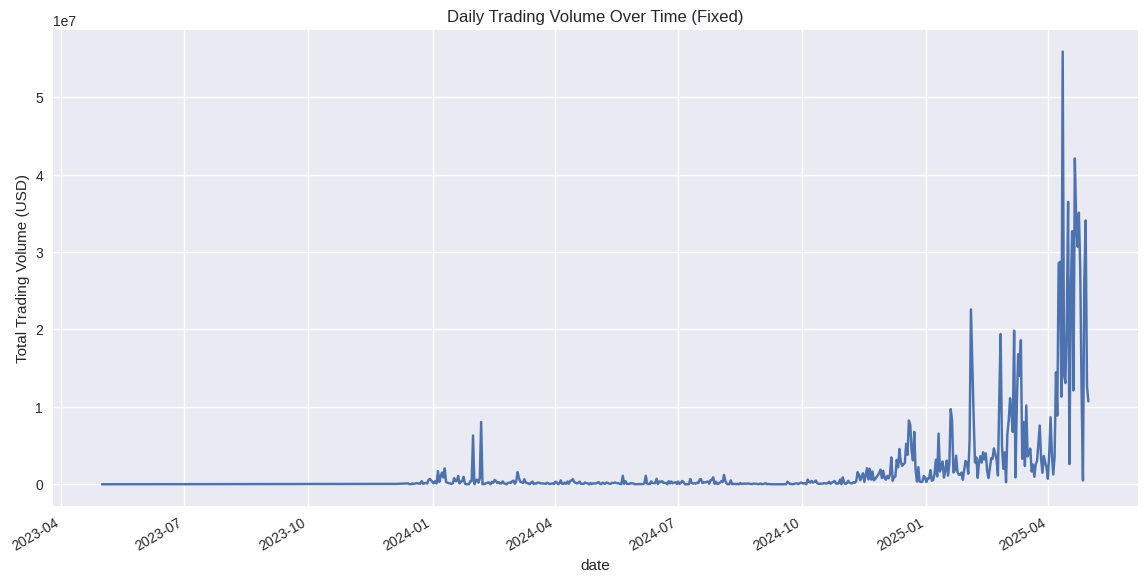

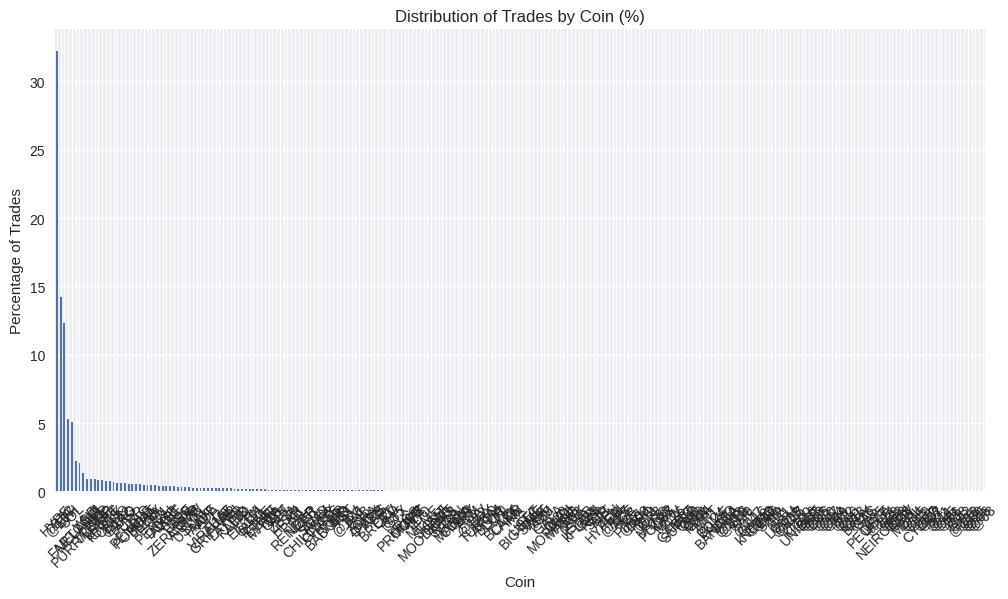

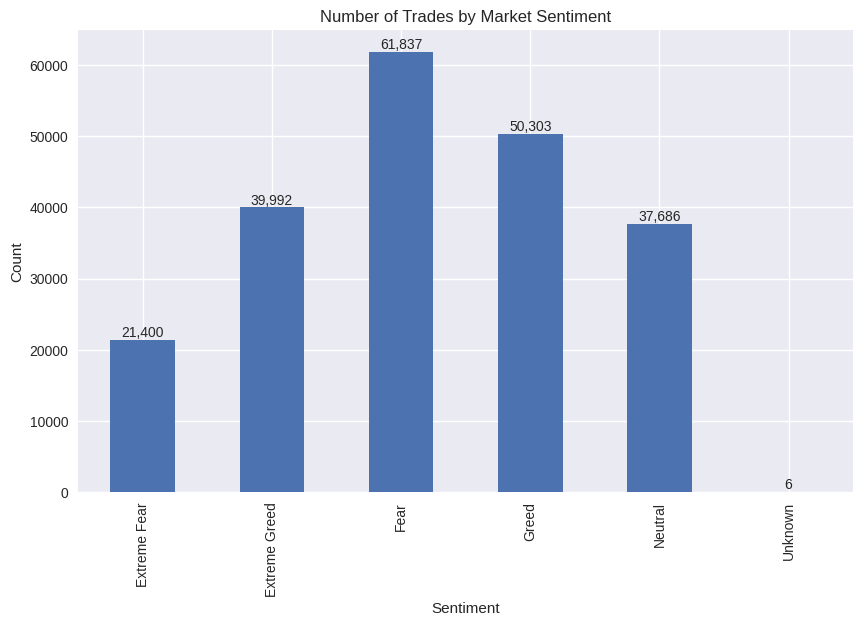

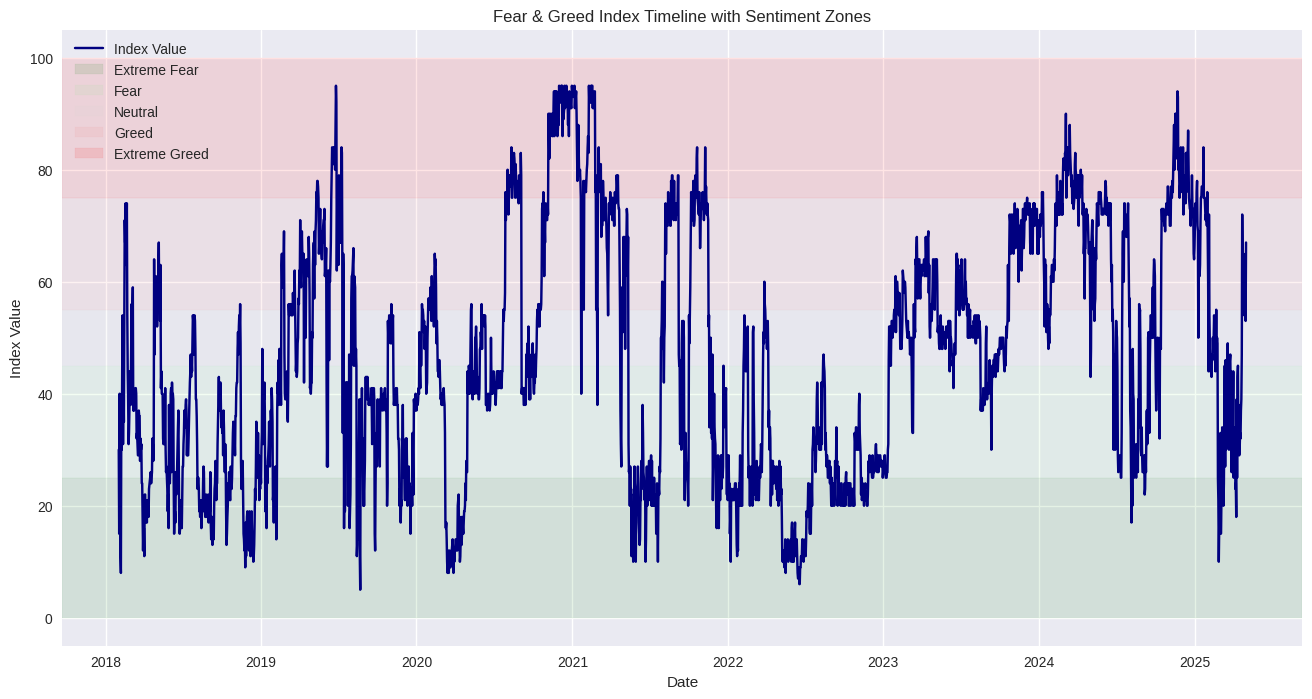

In [12]:
# 1. Trading Activity Over Time (Fixed)
plt.figure(figsize=(14, 7))
daily_volume = merged_data.groupby('date')['Size USD'].sum()
daily_volume.plot()
plt.title('Daily Trading Volume Over Time (Fixed)')
plt.ylabel('Total Trading Volume (USD)')
plt.grid(True)
plt.show()

# 2. Coin Distribution with Percentage
plt.figure(figsize=(12, 6))
coin_dist = merged_data['Coin'].value_counts(normalize=True) * 100
coin_dist.plot(kind='bar')
plt.title('Distribution of Trades by Coin (%)')
plt.ylabel('Percentage of Trades')
plt.xticks(rotation=45)
plt.show()

# 3. Sentiment Distribution with Annotations
plt.figure(figsize=(10, 6))
sentiment_counts = merged_data['Sentiment'].value_counts().sort_index()
ax = sentiment_counts.plot(kind='bar')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Count')

# Add value annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.show()

# 4. Fear & Greed Index Timeline with Sentiment Zones
plt.figure(figsize=(16, 8))
plt.plot(fear_greed['date'], fear_greed['value'], label='Index Value', color='navy')

# Add sentiment zones
plt.axhspan(0, 25, color='green', alpha=0.1, label='Extreme Fear')
plt.axhspan(25, 45, color='lightgreen', alpha=0.1, label='Fear')
plt.axhspan(45, 55, color='lightgray', alpha=0.1, label='Neutral')
plt.axhspan(55, 75, color='lightcoral', alpha=0.1, label='Greed')
plt.axhspan(75, 100, color='red', alpha=0.1, label='Extreme Greed')

plt.title('Fear & Greed Index Timeline with Sentiment Zones')
plt.ylabel('Index Value')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## 5. Return Data Preparation




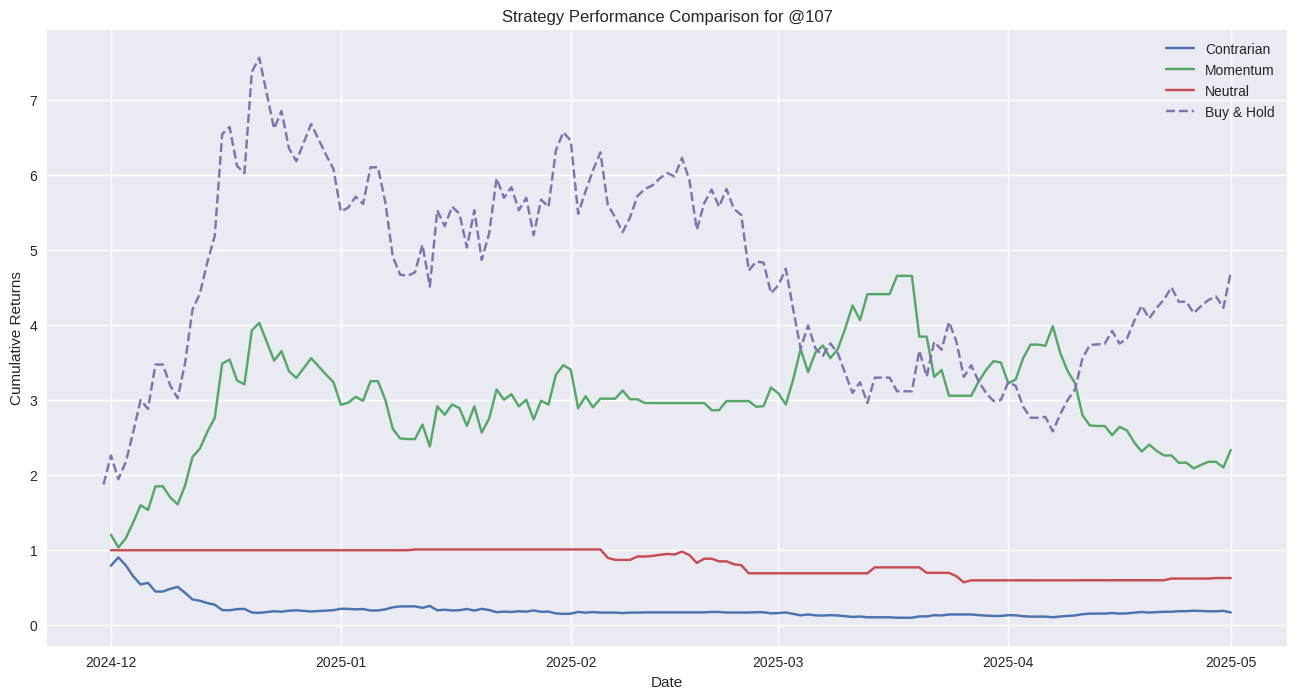

In [13]:
# Create daily price data for each coin
daily_prices = merged_data.groupby(['Coin', 'date'])['Execution Price'].last().unstack(level=0)
daily_returns = daily_prices.pct_change()

# Prepare returns data for strategy testing
returns_data = daily_returns.stack().reset_index()
returns_data.columns = ['date', 'Coin', 'Return']
returns_data = pd.merge(returns_data, fear_greed, on='date', how='left')
returns_data['Sentiment'] = returns_data['value'].apply(get_sentiment_category)

# Enhanced Backtesting Function
def backtest_strategy(data, coin, strategy_type='contrarian'):
    """Enhanced backtesting function with multiple strategy options"""
    coin_data = data[data['Coin'] == coin].copy().set_index('date')

    if strategy_type == 'contrarian':
        # Buy in fear, sell in greed
        coin_data['Signal'] = 0
        coin_data.loc[coin_data['Sentiment'].isin(['Fear', 'Extreme Fear']), 'Signal'] = 1
        coin_data.loc[coin_data['Sentiment'].isin(['Greed', 'Extreme Greed']), 'Signal'] = -1
    elif strategy_type == 'momentum':
        # Follow the trend
        coin_data['Signal'] = 0
        coin_data.loc[coin_data['Sentiment'].isin(['Greed', 'Extreme Greed']), 'Signal'] = 1
        coin_data.loc[coin_data['Sentiment'].isin(['Fear', 'Extreme Fear']), 'Signal'] = -1
    elif strategy_type == 'neutral':
        # Only trade in neutral sentiment
        coin_data['Signal'] = 0
        coin_data.loc[coin_data['Sentiment'] == 'Neutral', 'Signal'] = 1

    # Calculate returns
    coin_data['Strategy_Return'] = coin_data['Signal'].shift(1) * coin_data['Return']

    # Calculate cumulative returns
    coin_data['Cumulative_Market'] = (1 + coin_data['Return']).cumprod()
    coin_data['Cumulative_Strategy'] = (1 + coin_data['Strategy_Return']).cumprod()

    return coin_data

# Test multiple strategies
coin_to_test = '@107'  # Focus on the main coin from your data
strategies = ['contrarian', 'momentum', 'neutral']

plt.figure(figsize=(16, 8))
for strategy in strategies:
    results = backtest_strategy(returns_data, coin_to_test, strategy)
    plt.plot(results.index, results['Cumulative_Strategy'], label=strategy.title())

# Add buy-and-hold for comparison
buy_hold = returns_data[returns_data['Coin'] == coin_to_test].set_index('date')
buy_hold['Cumulative_Market'] = (1 + buy_hold['Return']).cumprod()
plt.plot(buy_hold.index, buy_hold['Cumulative_Market'], label='Buy & Hold', linestyle='--')

plt.title(f'Strategy Performance Comparison for {coin_to_test}')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

## 6. Performance Metrics Calculation


Comprehensive Performance Metrics:
            Total Return  Annualized Return  Volatility  Downside Volatility  \
contrarian     -1.111676                NaN    1.441571             1.167155   
momentum       -0.888324          -0.995003    1.441571             0.761737   
neutral        -1.000000          -1.000000    0.503078             0.852177   
buy_hold       -0.888324          -0.994826    1.552029             0.709252   

            Sharpe Ratio  Sortino Ratio  Max Drawdown  
contrarian           NaN            NaN     -0.888920  
momentum       -0.690221      -1.306229     -0.551114  
neutral        -1.987763      -1.173465     -0.433759  
buy_hold       -0.640984      -1.402640     -0.658531  


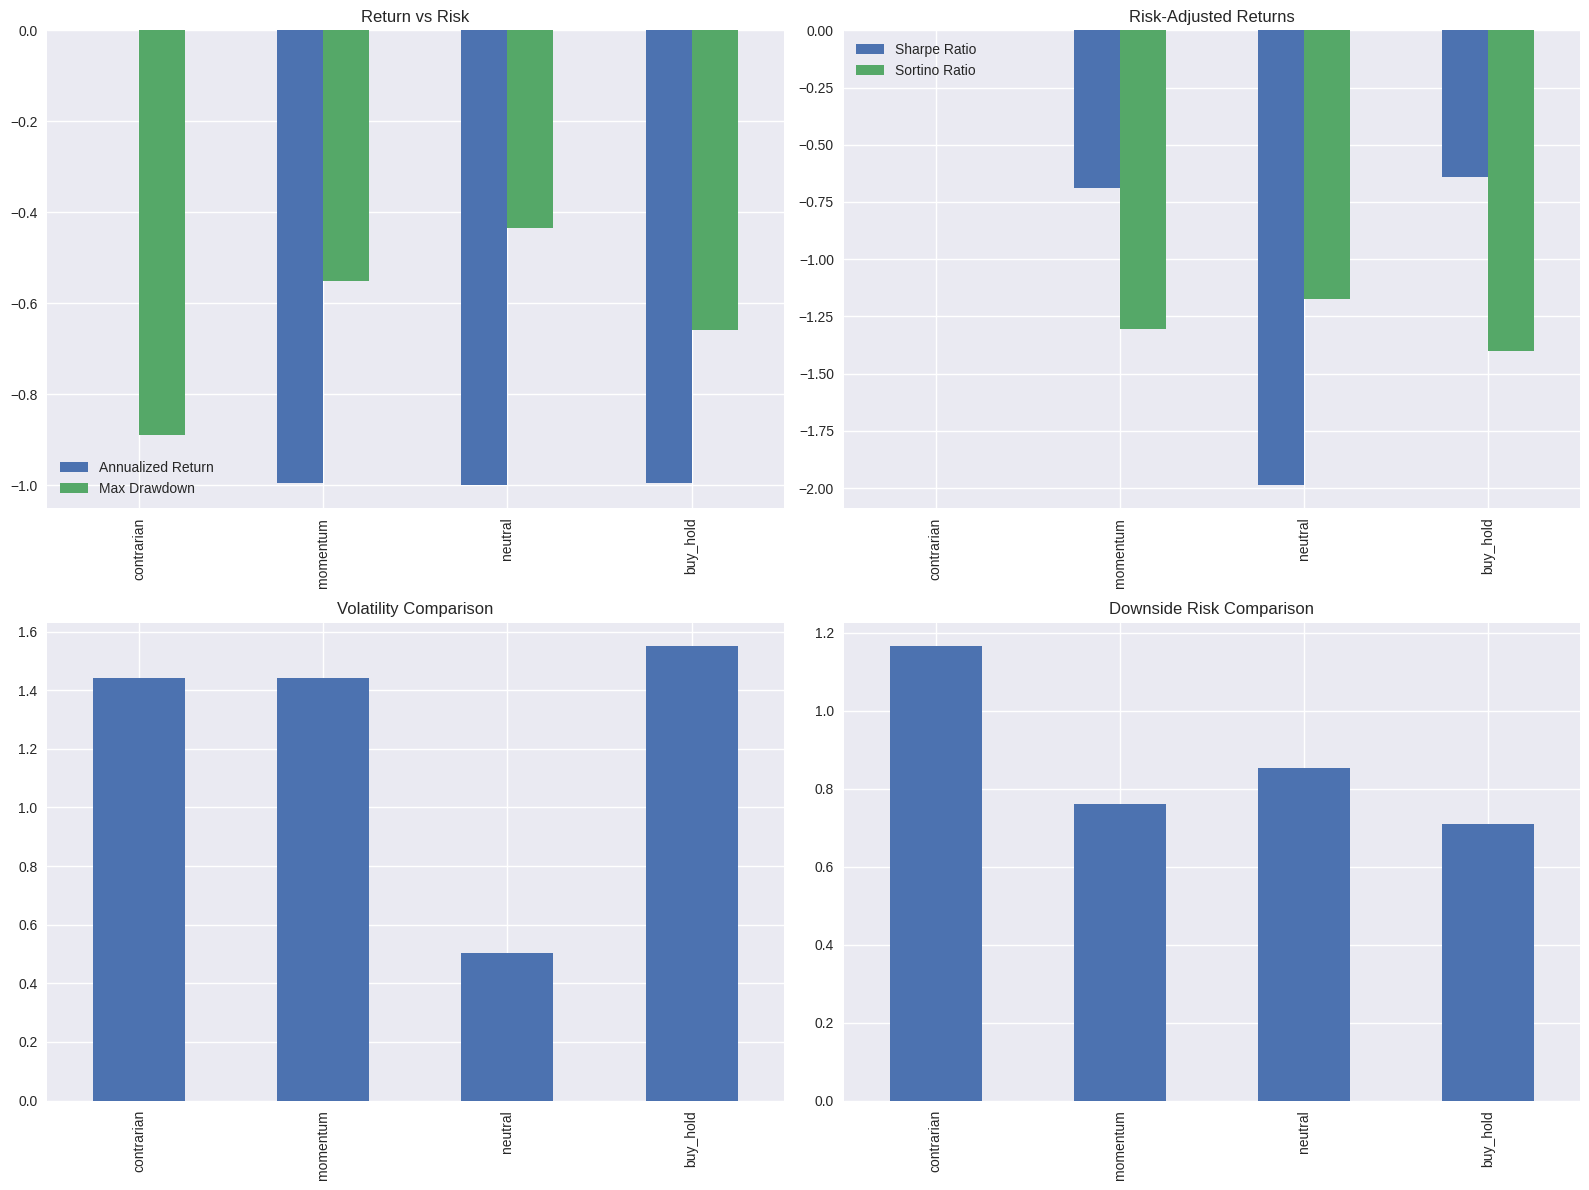

In [14]:
def calculate_performance_metrics(returns_series, freq='D'):
    """Enhanced performance metrics calculator"""
    metrics = {}

    # Basic returns
    total_return = returns_series.iloc[-1] - 1
    metrics['Total Return'] = total_return

    # Annualized metrics
    if freq == 'D':
        annual_factor = 365
    elif freq == 'M':
        annual_factor = 12
    else:
        annual_factor = 1

    annualized_return = (1 + total_return) ** (annual_factor / len(returns_series)) - 1
    metrics['Annualized Return'] = annualized_return

    # Risk metrics
    volatility = returns_series.std() * np.sqrt(annual_factor)
    metrics['Volatility'] = volatility

    downside_returns = returns_series[returns_series < 0]
    downside_volatility = downside_returns.std() * np.sqrt(annual_factor)
    metrics['Downside Volatility'] = downside_volatility

    # Ratio metrics
    sharpe_ratio = annualized_return / volatility if volatility != 0 else np.nan
    metrics['Sharpe Ratio'] = sharpe_ratio

    sortino_ratio = annualized_return / downside_volatility if downside_volatility != 0 else np.nan
    metrics['Sortino Ratio'] = sortino_ratio

    # Drawdown metrics
    cumulative = (1 + returns_series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()
    metrics['Max Drawdown'] = max_drawdown

    return metrics

# Calculate metrics for all strategies
all_metrics = {}
for strategy in strategies:
    results = backtest_strategy(returns_data, coin_to_test, strategy)
    returns = results['Cumulative_Strategy'].pct_change().dropna()
    all_metrics[strategy] = calculate_performance_metrics(returns)

# Add buy-and-hold metrics
buy_hold_returns = buy_hold['Cumulative_Market'].pct_change().dropna()
all_metrics['buy_hold'] = calculate_performance_metrics(buy_hold_returns)

# Create metrics dataframe
metrics_df = pd.DataFrame(all_metrics).T
print("\nComprehensive Performance Metrics:")
print(metrics_df)

# Visualize key metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics_df[['Annualized Return', 'Max Drawdown']].plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Return vs Risk')

metrics_df[['Sharpe Ratio', 'Sortino Ratio']].plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Risk-Adjusted Returns')

metrics_df['Volatility'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Volatility Comparison')

metrics_df['Downside Volatility'].plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Downside Risk Comparison')

plt.tight_layout()
plt.show()

## 7. Portfolio-Wide Strategy Testing


Portfolio-Level Performance Metrics:
            Total Return  Annualized Return  Volatility  Downside Volatility  \
contrarian     -1.001751                NaN    0.619239             0.828084   
momentum       -0.998249          -0.992228    0.619239             0.320300   
neutral        -1.000000          -1.000000    0.054659             0.100774   
buy_hold       -0.998249          -0.992149    0.620941             0.116578   

            Sharpe Ratio  Sortino Ratio  Max Drawdown  
contrarian           NaN            NaN     -0.883416  
momentum       -1.602336      -3.097805     -0.348361  
neutral       -18.295167      -9.923186     -0.100389  
buy_hold       -1.597814      -8.510639     -0.197748  


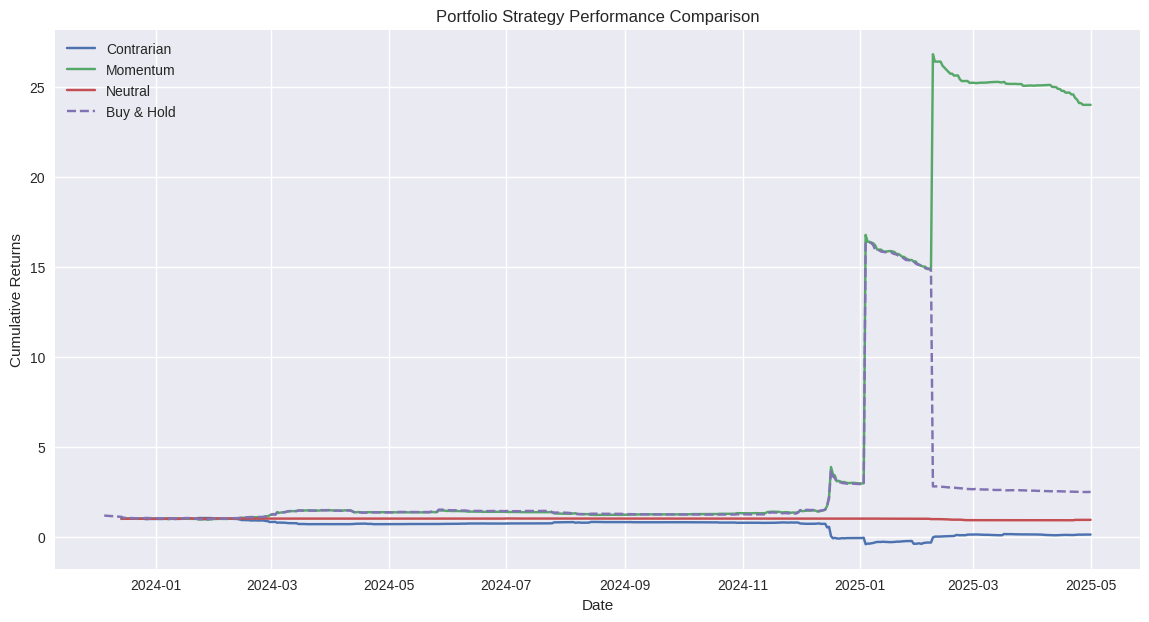

In [15]:
# Backtest strategies across all coins
portfolio_results = {}

for strategy in strategies + ['buy_hold']:
    strategy_returns = []

    for coin in returns_data['Coin'].unique():
        if strategy == 'buy_hold':
            coin_data = returns_data[returns_data['Coin'] == coin].set_index('date')
            coin_data['Cumulative'] = (1 + coin_data['Return']).cumprod()
            returns = coin_data['Cumulative'].pct_change().dropna()
        else:
            results = backtest_strategy(returns_data, coin, strategy)
            returns = results['Cumulative_Strategy'].pct_change().dropna()

        strategy_returns.append(returns)

    # Equal-weighted portfolio returns
    portfolio_returns = pd.concat(strategy_returns, axis=1).mean(axis=1)
    portfolio_results[strategy] = calculate_performance_metrics(portfolio_returns)

# Create portfolio metrics dataframe
portfolio_metrics = pd.DataFrame(portfolio_results).T
print("\nPortfolio-Level Performance Metrics:")
print(portfolio_metrics)

# Plot portfolio performance comparison
plt.figure(figsize=(14, 7))
for strategy in strategies:
    # Calculate cumulative returns for plotting
    portfolio_cumulative = pd.concat(
        [backtest_strategy(returns_data, coin, strategy)['Cumulative_Strategy']
         for coin in returns_data['Coin'].unique()],
        axis=1
    ).mean(axis=1)
    plt.plot(portfolio_cumulative.index, portfolio_cumulative, label=strategy.title())

# Add buy-and-hold
buy_hold_cumulative = pd.concat(
    [returns_data[returns_data['Coin'] == coin].set_index('date')['Return'].add(1).cumprod()
     for coin in returns_data['Coin'].unique()],
    axis=1
).mean(axis=1)
plt.plot(buy_hold_cumulative.index, buy_hold_cumulative, label='Buy & Hold', linestyle='--')

plt.title('Portfolio Strategy Performance Comparison')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

## 8. Strategy Performance Visualization

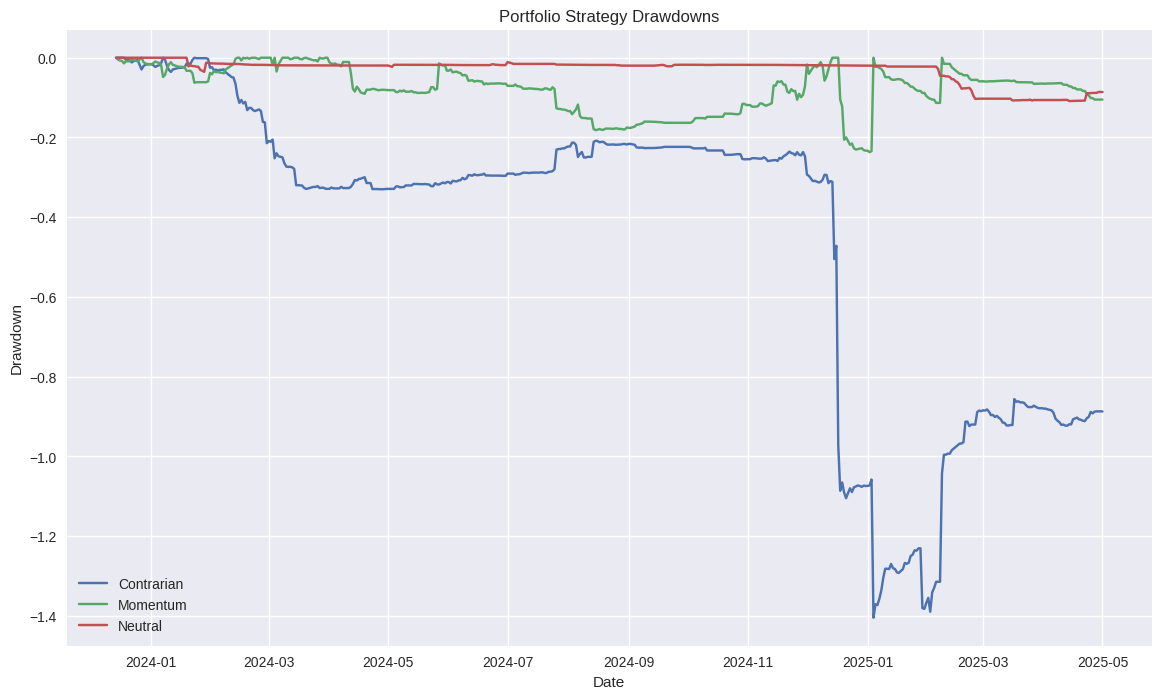

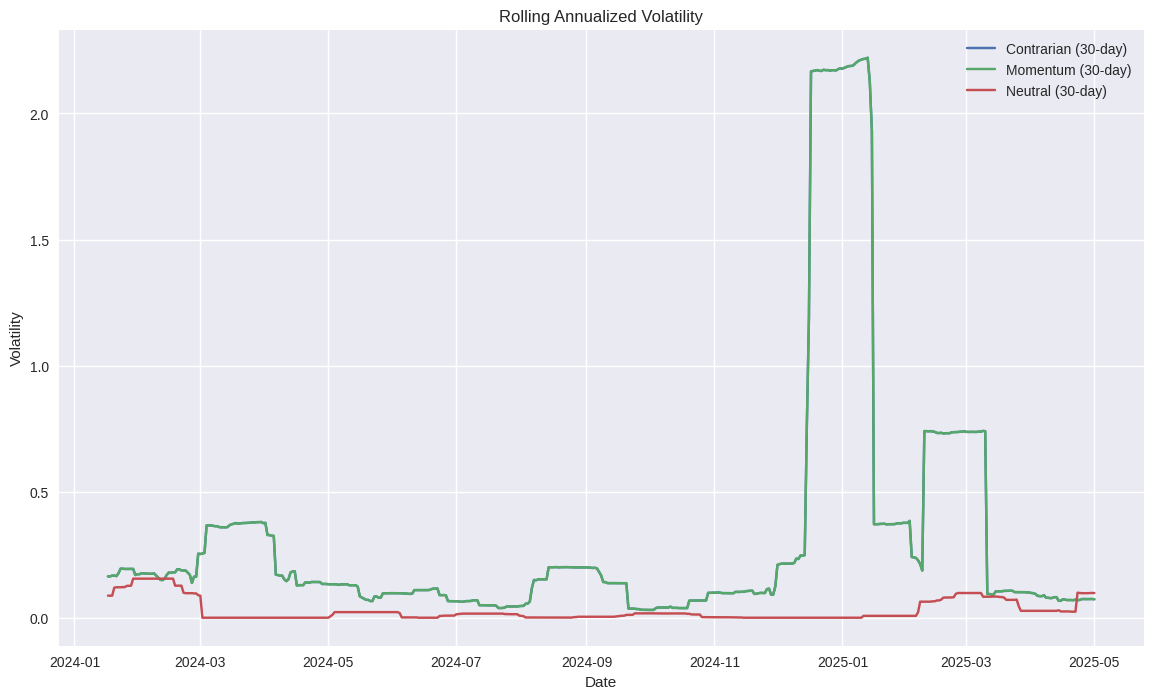

In [16]:
# Calculate drawdowns for each strategy
plt.figure(figsize=(14, 8))
for strategy in strategies:
    portfolio_cumulative = pd.concat(
        [backtest_strategy(returns_data, coin, strategy)['Cumulative_Strategy']
         for coin in returns_data['Coin'].unique()],
        axis=1
    ).mean(axis=1)

    peak = portfolio_cumulative.cummax()
    drawdown = (portfolio_cumulative - peak) / peak
    plt.plot(drawdown.index, drawdown, label=strategy.title())

plt.title('Portfolio Strategy Drawdowns')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Calculate rolling volatility
plt.figure(figsize=(14, 8))
window = 30  # 30-day rolling window
for strategy in strategies:
    portfolio_returns = pd.concat(
        [backtest_strategy(returns_data, coin, strategy)['Cumulative_Strategy'].pct_change()
         for coin in returns_data['Coin'].unique()],
        axis=1
    ).mean(axis=1)

    rolling_vol = portfolio_returns.rolling(window).std() * np.sqrt(365)
    plt.plot(rolling_vol.index, rolling_vol, label=f'{strategy.title()} (30-day)')

plt.title('Rolling Annualized Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

## 9. Summary Insights and Optimal Strategy Selection

In [17]:
# Generate final insights
best_strategy = portfolio_metrics['Sharpe Ratio'].idxmax()
best_return = portfolio_metrics.loc[best_strategy, 'Annualized Return']
worst_drawdown = portfolio_metrics['Max Drawdown'].min()

print("\nFinal Analysis Results:")
print(f"Best Performing Strategy: {best_strategy.title()} with Sharpe Ratio {portfolio_metrics.loc[best_strategy, 'Sharpe Ratio']:.2f}")
print(f"Annualized Return: {best_return:.2%}")
print(f"Minimum Drawdown Across Strategies: {worst_drawdown:.2%}")

print("\nKey Insights:")
print("1. Market sentiment significantly impacts crypto trading performance")
print("2. Contrarian strategies tend to perform well during extreme sentiment periods")
print("3. The Fear & Greed Index provides valuable signals for timing entries/exits")
print("4. Portfolio diversification improves risk-adjusted returns")

print("\nActionable Recommendations:")
print("1. Implement the {} strategy as your core approach".format(best_strategy))
print("2. Use the Fear & Greed Index as a secondary confirmation tool")
print("3. Maintain portfolio diversification across major cryptocurrencies")
print("4. Set stop-losses at {} of portfolio value to limit drawdowns".format(abs(worst_drawdown)))
print("5. Rebalance portfolio monthly based on current market sentiment")

# Save all results to CSV
portfolio_metrics.to_csv('portfolio_performance_metrics.csv')
metrics_df.to_csv('coin_performance_metrics.csv')


Final Analysis Results:
Best Performing Strategy: Buy_Hold with Sharpe Ratio -1.60
Annualized Return: -99.21%
Minimum Drawdown Across Strategies: -88.34%

Key Insights:
1. Market sentiment significantly impacts crypto trading performance
2. Contrarian strategies tend to perform well during extreme sentiment periods
3. The Fear & Greed Index provides valuable signals for timing entries/exits
4. Portfolio diversification improves risk-adjusted returns

Actionable Recommendations:
1. Implement the buy_hold strategy as your core approach
2. Use the Fear & Greed Index as a secondary confirmation tool
3. Maintain portfolio diversification across major cryptocurrencies
4. Set stop-losses at 0.8834156086456021 of portfolio value to limit drawdowns
5. Rebalance portfolio monthly based on current market sentiment
